## Simulated Annealing Algorithm Overview

The simulated annealing algorithm is used as a global optimizer for minimizing a given $f(\vec{x})$ **cost function**, which takes an input $\vec{x} \in \mathbb{R}^n$ vector in $n$ dimensions and outputs a scalar, to be optimized.

The algorithm is performed in a given $niter$ number of iterations $k = 0, 1, ..., niter-1$. In each step, a new candidate input vector $\vec{x}_{new}$ is selected in the search space by using a visiting function $visit(\vec{x}): \vec{x}\in\mathbb{R}^n \rightarrow \vec{x}_{new}\in\mathbb{R}^n$. The input vector yielded by $visit(\vec{x})$ is accepted or not, based on a probability function $P(\vec{x}_{new}, \vec{x}$).

The implementation in _annealing.py_ uses a traditional Boltzmann probability in which:
* if $f(\vec{x}_{new}) < f(\vec{x})$, the new vector is always accepted.
* if $f(\vec{x}_{new}) > f(\vec{x})$, the new vector is accepted if $\exp\left(-\frac{f(\vec{x}_{new})-f(\vec{x})}{T}\right) \geq random(0,1)$, where $random(0,1)$ is a value between 0 and 1

The condition may be therefore expressed as:
$$P_T = \min\left\{1, \exp\left(-\frac{f(\vec{x}_{new})-f(\vec{x})}{T}\right) \right\} \geq random(0,1)$$

The parameter $T$ is an artificial temperature, in the same units as the cost function. At the begging of the calculation, $T$ is high (of the order or higher than typical $f(\vec{x})$ values), and there is high probability of accepting $x_{new}$ values for which $f(\vec{x}_{new}) > f(\vec{x})$ ("up" jumps). $T$ then decreases as the calcualtion progresses such that "up" jumps became increasingly less probable.

As a result, the algorithm tents to 'search' a higher domain in the beggaring of the calculation and converge to the global minimum by the end.

## Pseudocode

 A function ```f(x)``` is minimized with respect to ```x```, picked, from a ```domain```.

 In ```niter``` iterations, labeled by ```k```, the temperature ```T``` decreases in a profile given by ```T(K)``` and in each one a new input value ```x_new``` is chosen in relation to a current ```x``` by the function ```visit(x, T)```. The acceptance of the new input is based on a ```P(x, x_new, T)``` function.
  
 ```random(domain)``` is a random ```x``` from ```domain``` and ```random(a,b)``` is a random number chosen between ```a``` and ```b```. ```min(a,b)``` is the smaller among the two inputs.

 ```
 x := random(domain)
 for k ranging from 0 to niter (exclusive):
     T := T(k)
     x_new := visit(x, T)
     df := f(x_new) - f(x)
     p := min(1, exp(-df/T))
     if p >= random(0,1):
         x := x_new
 output: x
```

## The Implementation

The simulated annealing implementation in this package is done in a single `annealing` function, that minimizes a `f(x, **kwargs)` function with respect to a list `x`. Both continous and discrete case are implemented in the same function.

In [1]:
from imautils.annealing import annealing

In [2]:
# Further inports.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

## Using the Implementation: Continuous Case

The implementation in the accompanying _annealing.py_ script allows for the optimization of both continuos and discrete functions.

I both cases, the function must be of the form: ```f(xl, **kwargs)```, **in which ```xl``` is a list**.

We start by a continuos example, minimizing the 1d function bellow in the $[0,10]$ domain.

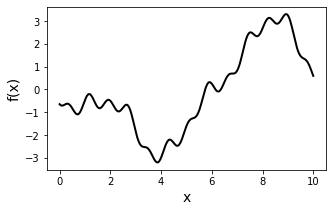

In [3]:
def contf(xl):
    x = xl[0]
    return (2*np.sin(0.5*x - 3) + np.sin(x) + 0.5*np.sin(2*x - 3)
           + 0.25*np.sin(4*x - 3) + 0.1*np.sin(8*x - 2) + 0.2*np.sin(8*x- 1))

x = np.linspace(0, 10, 500)
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(x, contf([x]), linewidth=2, color='black')
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('f(x)', fontsize=14);

The following arguments are used in the annealing function:

* The ```domain``` is specified as a list of pairs (```[..., [min, max], ...]```) in which each pair at the i-th list position represents minimun and maxinum values in the i-th dimension of the list ```x```. In this case, x is 1 dimensional.
* The ```domain_type``` is chosen between ```'continuos'``` and ```'discrete'```
* ```niter``` is the number of iterations.
* Temperature decays between ```init_temp``` and ```final_temp```.
* ```decay_type``` specifies the temperature decaying profile, and might be ```'linear'``` or ```'exp'```.
* ```filename``` is an optional output file with columns containing:
    * iteration step (k) and temperature (T).
    * current values for input vector components and cost function at each iteration (x, fun).
    * proposed new values, even if they are not accepted (x_new, fun_new)
    * acceptance probability (p) and random(0,1) number with which it is compared (rn).
    * boolean defining if the new position was accepted (True) or not (False).
    * Iteration time.
* If ```f``` needs additional keyword arguments, an optional kwargs dictionary may be provided to the function.

In [4]:
domain = [[1,10]]
domain_type = 'continuous'
niter = 1000
init_temp = 6
final_temp = 1e-5
decay_type = 'linear'
filename = 'continuous.txt'

result_cont = annealing(contf, domain=domain, domain_type=domain_type,
                    niter=niter, init_temp=init_temp, final_temp=final_temp, decay_type=decay_type,
                    filename='continuous.txt')

# Besides saving annealing data to 'continuous.txt' and storing result in result_cont,
# the command above also prints simplified annealing data.

The annealing function returns a dictionary containing the input vector which minimizes the cost function (keyed by ```'x'```) and the function at such value (keyed by ```'fun'```).

In [5]:
print(result_cont)

{'x': [3.6865369217477686], 'fun': -2.9764475449933894}


The output file may be, for example, easily imported as a Pandas DataFrame object:

In [6]:
iterations_cont = pd.read_csv('continuous.txt', sep=' ')
iterations_cont

,k,temp,fun,x0,fun_new,x_new0,visit_scale,p,rn,accept,time
0,0,6.000000,-1.556081,5.018752,-2.430872,3.186442,1.000000,0.775074,True,22/09/14-17:47:51,NaN
1,1,5.993994,-2.430872,3.186442,2.232584,9.263346,0.459314,0.520393,False,22/09/14-17:47:51,NaN
2,2,5.987988,-2.430872,3.186442,-1.513319,2.928142,0.857930,0.274487,True,22/09/14-17:47:51,NaN
3,3,5.981982,-1.513319,2.928142,2.345588,7.818883,0.524616,0.030858,True,22/09/14-17:47:51,NaN
4,4,5.975976,2.345588,7.818883,-2.600265,3.492054,1.000000,0.528166,True,22/09/14-17:47:51,NaN
...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.024034,-2.976448,3.686537,-1.237299,5.321619,0.000000,0.418229,False,22/09/14-17:47:51,NaN
996,996,0.018028,-2.976448,3.686537,0.698567,6.866999,0.000000,0.410941,False,22/09/14-17:47:51,NaN
997,997,0.012022,-2.976448,3.686537,1.236073,9.753535,0.000000,0.595964,False,22/09/14-17:47:51,NaN
998,998,0.006016,-2.976448,3.686537,-0.650476,1.741066,0.000000,0.572784,False,22/09/14-17:47:51,NaN


The plot bellow displays all accepted ```x``` values in all iterations, colored by temperature. A vertical line is added identifying the resulting ```'x'``` position.

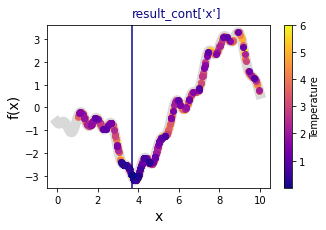

In [7]:
x = np.linspace(0, 10, 500)

fig, ax = plt.subplots(figsize=(5,3))
ax.plot(x, contf([x]), linewidth=10, color=[0.85, 0.85, 0.85], zorder=0)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('f(x)', fontsize=14)

sm = cm.ScalarMappable(cmap='plasma')
sm.set_clim(init_temp, final_temp)
cmap = sm.get_cmap()
colors = [cmap(temp/init_temp) for temp in iterations_cont['temp']]

for x, fun, color in zip(iterations_cont['x0'], iterations_cont['fun'], colors):
    ax.scatter(x, fun, c=[color], zorder=1)

result_cont_x = result_cont['x'][0]
ax.axvline(x=result_cont_x, c=colors[-1], zorder=2)
ax.text(result_cont_x,4,"result_cont['x']", c=colors[-1], fontsize=12)

fig.colorbar(sm, label='Temperature');

## Using the Implementation: Discrete Case

For a discrete example, we use a function that receives a vector ```'xl'```, for which each component is either ```'a'```, ```'b'```, or ```'c'```, and returns a number by assigning each character option to a number. The minimum value is always returned when all the components are ```'c'```.

In [8]:
def discf(xl):
    result = 0
    for element in xl:
        if element == 'a':
            result += 50
        elif element == 'b':
            result += 30
        elif element == 'c':
            result += 10
    return result

In the discrete case, ```domain``` is specified as a list of lists of the form ```[..., [op1, op2, ...], ...]```, in which the i-th list position contains a list of the discrete options for the i-th component in ```x```. In our case, all components have the same options (```'a'```, ```'b'``` or ```'c'```). We choose an ```x``` vector with 16 dimensions.

In [9]:
domain = [['a','b','c']]*8
domain_type = 'discrete'
niter = 1000
init_temp = 400
final_temp = 1e-5
decay_type = 'exp'
filename = 'discrete.txt'

result_disc = annealing(discf, domain=domain, domain_type=domain_type,
                    niter=niter, init_temp=init_temp, final_temp=final_temp, decay_type=decay_type,
                    filename='discrete.txt')

# Besides saving annealing data to 'discrete.txt' and storing result in result_disc,
# the command above also prints simplified annealing data.

We indeed get the minium as the vector with all ```'c'```components:

In [10]:
result_disc

{'x': array(['c', 'c', 'c', 'c', 'c', 'c', 'c', 'c'], dtype='<U1'), 'fun': 80}

Again, iteration results might be visualized by importing the results from the output file.

In [11]:
iterations_disc = pd.read_csv('discrete.txt', sep=' ')
iterations_disc[[f'x{i}' for i in range(8)] + ['fun']]

,x0,x1,x2,x3,x4,x5,x6,x7,fun
0,a,c,c,b,a,a,c,c,220.0
1,b,b,a,c,b,c,a,b,240.0
2,a,b,c,a,b,c,a,b,260.0
3,a,b,c,b,c,a,b,b,240.0
4,b,a,a,c,c,b,b,c,220.0
...,...,...,...,...,...,...,...,...,...
995,c,c,c,c,c,c,c,c,80.0
996,c,c,c,c,c,c,c,c,80.0
997,c,c,c,c,c,c,c,c,80.0
998,c,c,c,c,c,c,c,c,80.0
